In [1]:
import pandas as pd
import numpy as np
from sklearn import  linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd_carData = pd.read_csv("car_data.csv")

In [3]:
pd_carData.T

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Car_Name,ritz,sx4,ciaz,wagon r,swift,vitara brezza,ciaz,s cross,ciaz,ciaz,...,brio,jazz,city,amaze,city,city,brio,city,city,brio
Year,2014,2013,2017,2011,2014,2018,2015,2015,2016,2015,...,2015,2016,2010,2014,2015,2016,2015,2009,2017,2016
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,...,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,...,6.1,8.4,9.9,6.8,13.09,11.6,5.9,11.0,12.5,5.9
Kms_Driven,27000,43000,6900,5200,42450,2071,18796,33429,20273,42367,...,31427,12000,38000,33019,60076,33988,60000,87934,9000,5464
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,...,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Petrol,Diesel,Petrol
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,...,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,...,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd_carData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


In [5]:
pd_carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<h2>Analisis univariado</h2>

<p>Car name se elimina por ser string</p>

Analisis variable objetivo Selling_Price

boxplot es un tipo de grafico que facilmente nos permite identificar los outlayers, y la idea es eliminarlos

{'whiskers': [<matplotlib.lines.Line2D at 0x200d2ea2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x200d2ec11f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d2ea2880>],
 'medians': [<matplotlib.lines.Line2D at 0x200d2ec16d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d2ec19a0>],
 'means': []}

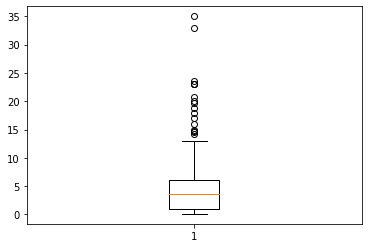

In [6]:
plt.boxplot(pd_carData['Selling_Price'],autorange=True)
# plt.hist(pd_carData['Selling_Price'],bins=30)
# pd_carData.groupby("Mfg_Month").size().plot(kind='bar')

(array([97., 16., 37., 36., 35., 20., 14., 15.,  5.,  6.,  2.,  1.,  4.,
         1.,  1.,  1.,  2.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([ 0.1       ,  1.26333333,  2.42666667,  3.59      ,  4.75333333,
         5.91666667,  7.08      ,  8.24333333,  9.40666667, 10.57      ,
        11.73333333, 12.89666667, 14.06      , 15.22333333, 16.38666667,
        17.55      , 18.71333333, 19.87666667, 21.04      , 22.20333333,
        23.36666667, 24.53      , 25.69333333, 26.85666667, 28.02      ,
        29.18333333, 30.34666667, 31.51      , 32.67333333, 33.83666667,
        35.        ]),
 <BarContainer object of 30 artists>)

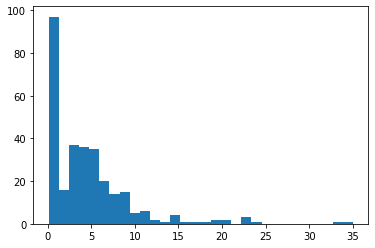

In [7]:
plt.hist(pd_carData['Selling_Price'],bins=30)

Present_Price

{'whiskers': [<matplotlib.lines.Line2D at 0x200d304ad00>,
 'caps': [<matplotlib.lines.Line2D at 0x200d305a2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d304aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x200d305a8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d305ab80>],
 'means': []}

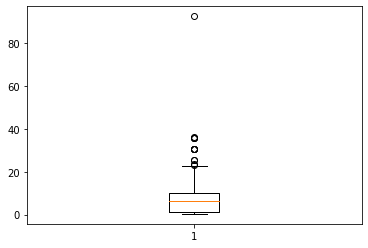

In [8]:
plt.boxplot(pd_carData['Present_Price'],autorange=True)

(array([102.,  49.,  72.,  25.,  25.,   8.,   4.,   4.,   2.,   5.,   0.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.32 ,  3.396,  6.472,  9.548, 12.624, 15.7  , 18.776, 21.852,
        24.928, 28.004, 31.08 , 34.156, 37.232, 40.308, 43.384, 46.46 ,
        49.536, 52.612, 55.688, 58.764, 61.84 , 64.916, 67.992, 71.068,
        74.144, 77.22 , 80.296, 83.372, 86.448, 89.524, 92.6  ]),
 <BarContainer object of 30 artists>)

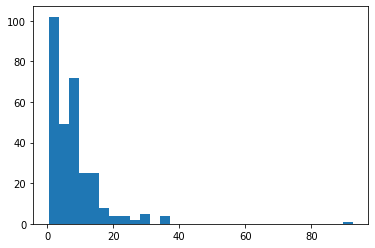

In [9]:
plt.hist(pd_carData['Present_Price'],bins=30)

Kms_Driven

{'whiskers': [<matplotlib.lines.Line2D at 0x200d314a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x200d314af40>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d314a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x200d3159520>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d31597f0>],
 'means': []}

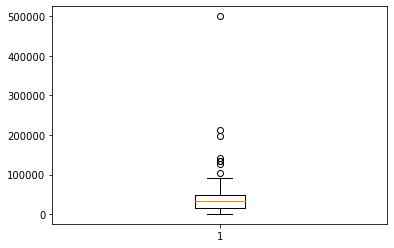

In [10]:
plt.boxplot(pd_carData['Kms_Driven'],autorange=True)

(array([88., 69., 79., 35., 16.,  6.,  1.,  1.,  3.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([   500.,  17150.,  33800.,  50450.,  67100.,  83750., 100400.,
        117050., 133700., 150350., 167000., 183650., 200300., 216950.,
        233600., 250250., 266900., 283550., 300200., 316850., 333500.,
        350150., 366800., 383450., 400100., 416750., 433400., 450050.,
        466700., 483350., 500000.]),
 <BarContainer object of 30 artists>)

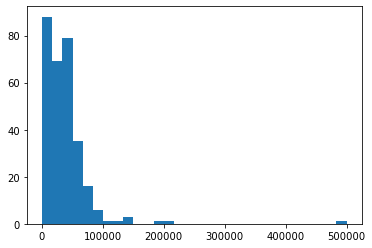

In [11]:
plt.hist(pd_carData['Kms_Driven'],bins=30)

Year

{'whiskers': [<matplotlib.lines.Line2D at 0x200d322ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x200d323e070>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d322e7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x200d323e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d323e8e0>],
 'means': []}

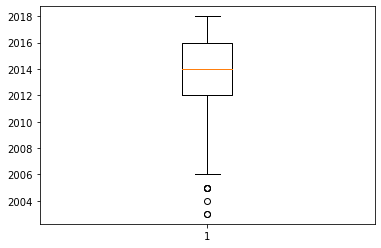

In [12]:
plt.boxplot(pd_carData['Year'],autorange=True)

(array([ 2.,  0.,  1.,  0.,  4.,  0.,  4.,  0.,  2.,  0.,  7.,  0.,  6.,
         0., 15.,  0., 19.,  0., 23.,  0., 33.,  0., 38.,  0., 61.,  0.,
        50.,  0., 35.,  1.]),
 array([2003. , 2003.5, 2004. , 2004.5, 2005. , 2005.5, 2006. , 2006.5,
        2007. , 2007.5, 2008. , 2008.5, 2009. , 2009.5, 2010. , 2010.5,
        2011. , 2011.5, 2012. , 2012.5, 2013. , 2013.5, 2014. , 2014.5,
        2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. ]),
 <BarContainer object of 30 artists>)

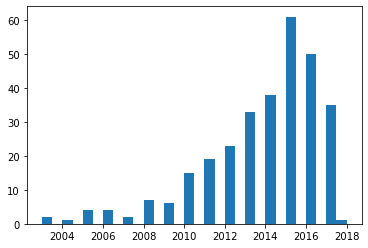

In [13]:
plt.hist(pd_carData['Year'],bins=30)

Kms_Driven

{'whiskers': [<matplotlib.lines.Line2D at 0x200d333afa0>,
 'caps': [<matplotlib.lines.Line2D at 0x200d4318580>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d333aca0>],
 'medians': [<matplotlib.lines.Line2D at 0x200d4318b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d4318df0>],
 'means': []}

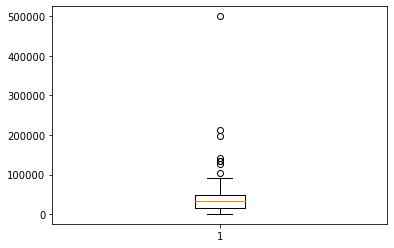

In [14]:
plt.boxplot(pd_carData['Kms_Driven'],autorange=True)

(array([88., 69., 79., 35., 16.,  6.,  1.,  1.,  3.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([   500.,  17150.,  33800.,  50450.,  67100.,  83750., 100400.,
        117050., 133700., 150350., 167000., 183650., 200300., 216950.,
        233600., 250250., 266900., 283550., 300200., 316850., 333500.,
        350150., 366800., 383450., 400100., 416750., 433400., 450050.,
        466700., 483350., 500000.]),
 <BarContainer object of 30 artists>)

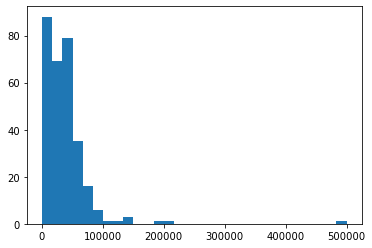

In [15]:
plt.hist(pd_carData['Kms_Driven'],bins=30)

Fuel_Type

In [16]:
var_dummies_FT = pd.get_dummies(pd_carData['Fuel_Type'])
pd_carData = pd_carData.drop(columns=['Fuel_Type'])

pd_carData[var_dummies_FT.columns]=var_dummies_FT

var_dummies_FT.columns

Index(['CNG', 'Diesel', 'Petrol'], dtype='object')

Cantidad con GNC: 2
Cantidad sin GNC: 299


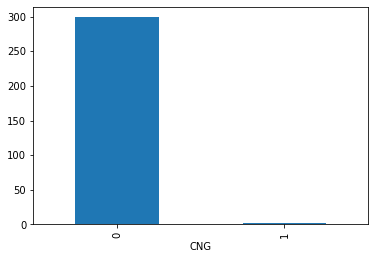

In [17]:
var_dummies_FT.groupby("CNG").size().plot(kind='bar')
print('Cantidad con GNC:',len(var_dummies_FT[var_dummies_FT['CNG'] == 1]))
print('Cantidad sin GNC:',len(var_dummies_FT[var_dummies_FT['CNG'] == 0]))

Cantidad con Petrol: 239
Cantidad sin Petrol: 62


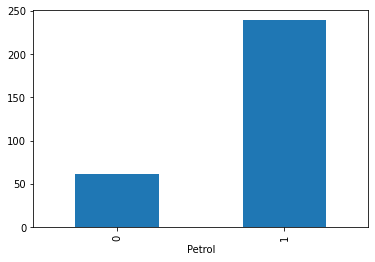

In [18]:
var_dummies_FT.groupby("Petrol").size().plot(kind='bar')
print('Cantidad con Petrol:',len(var_dummies_FT[var_dummies_FT['Petrol'] == 1]))
print('Cantidad sin Petrol:',len(var_dummies_FT[var_dummies_FT['Petrol'] == 0]))

Cantidad con Diesel: 60
Cantidad sin Diesel: 241


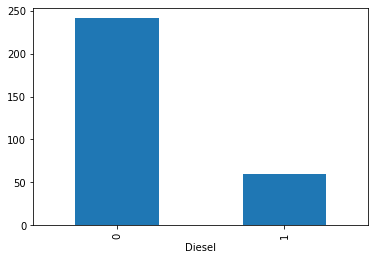

In [19]:
var_dummies_FT.groupby("Diesel").size().plot(kind='bar')
print('Cantidad con Diesel:',len(var_dummies_FT[var_dummies_FT['Diesel'] == 1]))
print('Cantidad sin Diesel:',len(var_dummies_FT[var_dummies_FT['Diesel'] == 0]))

Seller_Type

In [20]:
var_dummies_ST = pd.get_dummies(pd_carData['Seller_Type'])
pd_carData = pd_carData.drop(columns=['Seller_Type'])

pd_carData[var_dummies_ST.columns]=var_dummies_ST

var_dummies_ST.columns

Index(['Dealer', 'Individual'], dtype='object')

Cantidad con Dealer: 195
Cantidad sin Dealer: 106


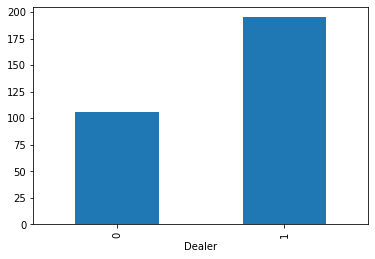

In [21]:
var_dummies_ST.groupby("Dealer").size().plot(kind='bar')
print('Cantidad con Dealer:',len(var_dummies_ST[var_dummies_ST['Dealer'] == 1]))
print('Cantidad sin Dealer:',len(var_dummies_ST[var_dummies_ST['Dealer'] == 0]))

Transmission

In [22]:
var_dummies_T = pd.get_dummies(pd_carData['Transmission'])
pd_carData = pd_carData.drop(columns=['Transmission'])

pd_carData[var_dummies_T.columns]=var_dummies_T

var_dummies_T.columns

Index(['Automatic', 'Manual'], dtype='object')

Cantidad con Automatic: 40
Cantidad sin Automatic: 261


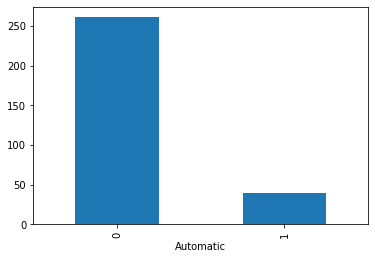

In [23]:
var_dummies_T.groupby("Automatic").size().plot(kind='bar')
print('Cantidad con Automatic:',len(var_dummies_T[var_dummies_T['Automatic'] == 1]))
print('Cantidad sin Automatic:',len(var_dummies_T[var_dummies_T['Automatic'] == 0]))

Owner

<AxesSubplot:xlabel='Owner'>

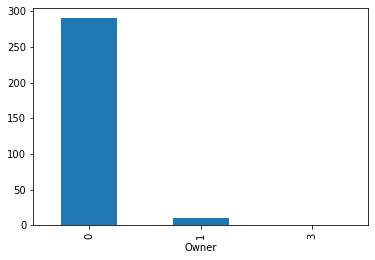

In [24]:
pd_carData.groupby("Owner").size().plot(kind='bar')

Se elimina valor altamente sesgado o ponderado 0

<h3>Truncado de los datos / eliminacion de outlayers</h3>

In [25]:
df_truncado = pd_carData[pd_carData['Selling_Price']<=12]
df_truncado = df_truncado[df_truncado['Selling_Price']>1]

{'whiskers': [<matplotlib.lines.Line2D at 0x200d46f6520>,
 'caps': [<matplotlib.lines.Line2D at 0x200d46f6ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d46f6220>],
 'medians': [<matplotlib.lines.Line2D at 0x200d47010a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d4701370>],
 'means': []}

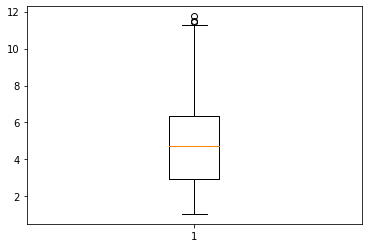

In [26]:
plt.boxplot(df_truncado['Selling_Price'],autorange=True)

(array([30., 31., 27., 39., 25., 17., 13., 10.,  4.,  7.]),
 array([ 1.05,  2.12,  3.19,  4.26,  5.33,  6.4 ,  7.47,  8.54,  9.61,
        10.68, 11.75]),
 <BarContainer object of 10 artists>)

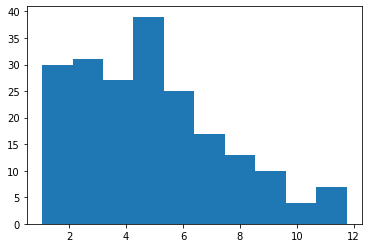

In [27]:
plt.hist(df_truncado['Selling_Price'],bins=10)

<h2>Eliminacion criterio propio</h2>
<p>solo Owner</p>

In [28]:
df_truncado = df_truncado.drop(columns=['Owner','Car_Name'])
df_truncado.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,203.0,2013.699507,2.772451,2003.00,2012.00,2014.00,2016.000,2018.00
Selling_Price,203.0,4.887291,2.587726,1.05,2.95,4.75,6.325,11.75
Present_Price,203.0,8.219015,4.517244,1.17,5.70,7.60,9.975,23.73
Kms_Driven,203.0,37397.709360,26009.339793,1200.00,17750.00,36000.00,50012.000,197176.00
CNG,203.0,0.009852,0.099012,0.00,0.00,0.00,0.000,1.00
Diesel,203.0,0.216749,0.413049,0.00,0.00,0.00,0.000,1.00
Petrol,203.0,0.773399,0.419667,0.00,1.00,1.00,1.000,1.00
Dealer,203.0,0.871921,0.335004,0.00,1.00,1.00,1.000,1.00
Individual,203.0,0.128079,0.335004,0.00,0.00,0.00,0.000,1.00
Automatic,203.0,0.088670,0.284970,0.00,0.00,0.00,0.000,1.00


<h1>Feature Selection</h1>

In [29]:
y = df_truncado['Selling_Price']
x = pd.DataFrame(df_truncado.drop(columns=['Selling_Price'],axis=1))

<h3>Escalado/Normalizacion con mixmax, Feature Scaling</h3>

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_MinMax = scaler.fit_transform(x)

In [31]:
x_scaled = pd.DataFrame(x_MinMax,columns=x.columns)
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,203.0,0.713300,0.184830,0.0,0.600000,0.733333,0.866667,1.0
Present_Price,203.0,0.312456,0.200232,0.0,0.200798,0.285018,0.390293,1.0
Kms_Driven,203.0,0.184705,0.132717,0.0,0.084449,0.177573,0.249071,1.0
CNG,203.0,0.009852,0.099012,0.0,0.000000,0.000000,0.000000,1.0
Diesel,203.0,0.216749,0.413049,0.0,0.000000,0.000000,0.000000,1.0
Petrol,203.0,0.773399,0.419667,0.0,1.000000,1.000000,1.000000,1.0
Dealer,203.0,0.871921,0.335004,0.0,1.000000,1.000000,1.000000,1.0
Individual,203.0,0.128079,0.335004,0.0,0.000000,0.000000,0.000000,1.0
Automatic,203.0,0.088670,0.284970,0.0,0.000000,0.000000,0.000000,1.0
Manual,203.0,0.911330,0.284970,0.0,1.000000,1.000000,1.000000,1.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (162, 10)
x test:  (41, 10)
y train:  (162,)
y test:  (41,)


In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [35]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

LASSO

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.83
Test R2-score : 0.76
Train CV scores : [0.90535563 0.8675693  0.69641377 0.75652075 0.7997689 ]
Train CV mean : 0.81


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


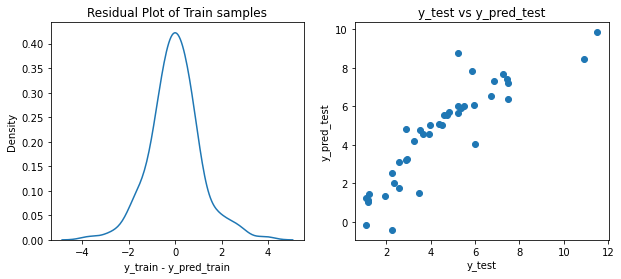

In [37]:
car_pred_model(ls_rs,"lasso.pkl")

RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.98
Test R2-score : 0.94
Train CV scores : [0.88082547 0.81085781 0.85335448 0.78439866 0.8055088 ]
Train CV mean : 0.83


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


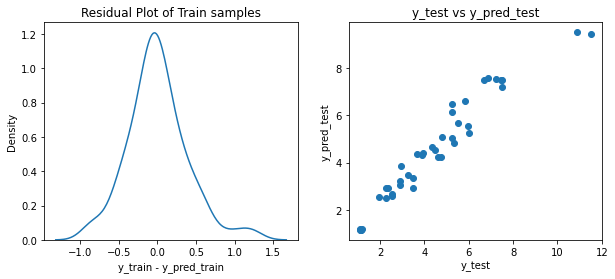

In [39]:
car_pred_model(rf_rs,'random_forest.pkl')